# **Tendências Musicais: Análise do Top 200 do Spotify**

<div align="right">

##### LinkedIn: [Eandro Cleiton](https://www.linkedin.com/in/eandro-cleiton/)  
##### GitHub: [EandroC](https://github.com/EandroC)

</div>

## **1\. Introdução**

### **1\.1\. Contexto**

Este notebook de análise exploratória de dados tem como objetivo examinar um conjunto de dados que reúne informações sobre músicas que alcançaram o top 200 do Spotify a partir de 2016. Incluindo dados como o número de streams e semanas nas paradas, além de características de áudio como ritmo, tom e dançabilidade. Essas informações foram coletadas usando a API web do Spotify.

### **1\.2\. Objetivo**

Investigar os dados das músicas presentes nas listas de reprodução do "Top 200" do Spotify a partir de 2016, visando compreender os padrões de popularidade e as tendências musicais com base em suas características de áudio e atributos musicais. O objetivo é fornecer insights sobre as preferências do público e os elementos que influenciam na entradas dessas faixas nessa lista de mais reproduzidas.

### **1\.3\. Ferramentas Utilizadas**

Durante esse storytelling, foram empregadas as seguintes ferramentas:
- **Python:** Linguagem principal para manipulação, análise e visualização de dados. E suas bibliotecas:
    - **Pandas:** Manipulação de dados tabulares.
    - **Numpy:** Operações numéricas.
    - **Matplotlib.pyplot:** Visualização de dados.
    - **Matplotlib.patches import Patch:** Manipulação de elementos gráficos.
    - **re:** Manipulação de expressões regulares.
- **Kaggle:** é uma plataforma online que oferece conjuntos de dados, competições de ciência de dados, cursos e ambientes de computação em nuvem. Foi utilizado para acessar os dados.

#### **1\.3\.1\. Importação das bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import re

## **2\. Exploração dos dados**

Serão exploradas as colunas para identificar padrões e distribuições de dados em larga escala, proporcionando uma compreensão mais profunda e abrangente das informações presentes no conjunto de dados. Essa análise permitirá entender a natureza dos dados.

### **2\.1\. Guia sobre as colunas do CSV**

- **id:** É um identificador único para a faixa, usado dentro da plataforma do Spotify para referência e recuperação fácil da música.

- **artist_names:** Esta coluna contém o nome ou nomes do artista ou artistas que criaram a faixa. Ajuda a identificar os criadores da música.

- **track_name:** O nome da faixa, que serve como seu título. É como a faixa é comumente referida e reconhecida.

- **source:** A fonte refere-se ao nome da gravadora que lançou a faixa. Ajuda a identificar a entidade responsável pela distribuição da música.

- **key:** Refere-se à tonalidade musical na qual a música é composta. Indica o centro tonal ou altura em torno do qual a melodia e a harmonia giram.

- **mode:** Indica se a faixa está em uma tonalidade maior ou menor, fornecendo insights sobre o humor geral ou a qualidade emocional da música.

- **time_signature:** Convenção notacional usada em partituras para indicar o número de batidas em cada compasso e o tipo de nota que recebe uma batida. Ajuda os músicos a interpretar o ritmo da faixa.

- **danceability:** Descreve o quão adequada uma faixa é para dançar com base em vários elementos musicais, como tempo, estabilidade rítmica, força do ritmo e regularidade geral. Varia de 0.0 (menos dançável) a 1.0 (mais dançável).

- **energy:** É uma medida perceptual de intensidade e atividade dentro de uma faixa, variando de 0.0 a 1.0. Reflete qualidades como tempo, volume e instrumentação que contribuem para a excitação ou vigor geral da música.

- **speechiness:** Detecta a presença de palavras faladas em uma faixa, distinguindo entre música puramente instrumental e faixas contendo elementos vocais, como canto ou fala. Varia de 0.0 (música) a 1.0 (apenas palavras faladas).

- **acousticness:** Medida que varia de 0.0 a 1.0 e indica a probabilidade de uma faixa ser acústica, com valores mais altos sugerindo uma proporção maior de instrumentação acústica.

- **instrumentalness:** Prevê se uma faixa contém vocais ou é puramente instrumental. Varia de 0.0 (vocais presentes) a 1.0 (sem vocais), com valores mais altos indicando uma maior probabilidade de música instrumental.

- **liveness:** Detecta a presença de uma plateia em uma gravação, com valores mais altos indicando uma maior probabilidade de a faixa ter sido executada ao vivo em vez de em um estúdio.

- **valence:** É medida a positividade musical transmitida por uma faixa, variando de 0.0 (negativa) a 1.0 (positiva). Reflete o conteúdo emocional da música, com valores mais altos indicando um humor mais positivo.

- **loudness:** Mede o volume geral de uma faixa em decibéis (dB), fornecendo informações sobre sua intensidade ou amplitude percebida. Influencia a percepção de "volume" ou "suavidade" da música.

- **tempo:** Refere-se à velocidade geral ou ao ritmo de uma faixa, medido em batidas por minuto (BPM). Indica o quão rápido ou lento a música soa e influencia seu caráter rítmico.

- **duration_ms:** A duração da faixa em milissegundos (ms), representando o tempo total desde o início até o fim da música.

- **weeks_on_chart:** O número de semanas que a faixa passou nas paradas das 200 melhores, indicando sua popularidade e longevidade em termos de desempenho nas paradas.

- **streams:** O número de vezes que a faixa foi reproduzida durante seu período nas paradas, fornecendo insights sobre sua popularidade e engajamento dos ouvintes.


### 2\.2\. Visualizando do DataFrame

In [2]:
dados = pd.read_csv('spotify_top_songs_audio_features.csv', sep=',')
dados.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


### 2\.3\. Dimensões do DataFrame

In [3]:
dados.shape

(6513, 19)

### 2\.4\. Tipos das Colunas

In [4]:
dados.dtypes

id                   object
artist_names         object
track_name           object
source               object
key                  object
mode                 object
time_signature       object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
tempo               float64
duration_ms           int64
weeks_on_chart        int64
streams               int64
dtype: object

### 2\.5\. Removendo Coluna

Removendo coluna 'id',  pois não achei utilidade para ela.

In [5]:
dados = dados.drop('id', axis=1)

### 2\.6\. Divisão proposta
#### Artistas, Faixas e Descrições:
- artist_names
- track_name
- source
- key
- mode
- time_signature

#### Atributos Musicais:
- danceability
- energy
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- loudness
- tempo
- duration_ms

#### Popularidade e Desempenho:
- weeks_on_chart
- streams

## 3\. Artistas, Faixas e Descrições

### 3\.1\. Contagem de Aparições dos 10 Artistas Mais Populares

Nesta análise das aparições de artistas ou bandas no Top 200 do Spotify, são consideradas todas as faixas em que o artista está presente, incluindo suas participações e colaborações, desde que seu nome esteja listado na coluna "artist_names".

In [6]:
# Divide as strings da coluna 'artist_names' em artistas individuais e conta as ocorrências
artistas = dados['artist_names'].str.split(', ').explode().value_counts().reset_index()

# Renomeia as colunas
artistas.columns = ['Artista', 'QtdAparicoes']

artistas.head(10)

,Artista,QtdAparicoes
0,Drake,229
1,Taylor Swift,203
2,Bad Bunny,159
3,Travis Scott,127
4,Post Malone,111
5,Juice WRLD,110
6,The Weeknd,104
7,Ariana Grande,101
8,21 Savage,97
9,BTS,95


#### 3\.1\.1\. Gráfico

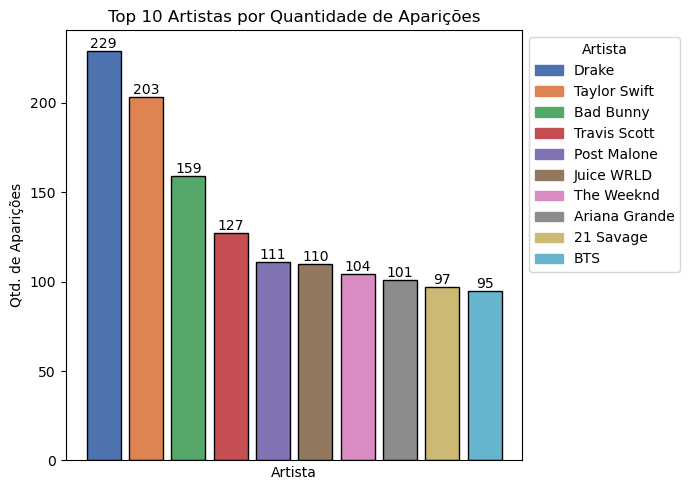

In [7]:
artistas = artistas.sort_values(by='QtdAparicoes', ascending=False)

top_10 = artistas.head(10)

cores = sns.color_palette("deep", len(top_10))

plt.figure(figsize=(7, 5))

bars = plt.bar(range(10), top_10['QtdAparicoes'], color=cores, edgecolor='black')

plt.ylabel('Qtd. de Aparições')
plt.xlabel('Artista')
plt.title('Top 10 Artistas por Quantidade de Aparições')

for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xticks([])

legend_labels = top_10['Artista']
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Artista')

plt.tight_layout()

plt.show()

### 3\.2\. Contagem de Aparições das 10 Músicas Mais Populares

Aqui serão destacadas as músicas que mais frequentemente entraram no Top 200 do Spotify. É importante observar que novas versões da mesma música serão consideradas apenas se os mesmos artistas estiverem listados. Isso não implica necessariamente que foram as que permaneceram mais semanas no Top 200 ou são as mais reproduzidas, apenas indica que conseguiram entrar com maior frequência.

In [8]:
musicas = dados[['track_name', 'artist_names']].explode('artist_names').groupby(['track_name', 'artist_names']).size().reset_index(name='Quantidade')

musicas.columns = ['Musica', 'Artista', 'QtdAparicoes']
musicas = musicas.sort_values(by='QtdAparicoes', ascending=False)

musicas.head(10)

,Musica,Artista,QtdAparicoes
2324,Jingle Bell Rock,Bobby Helms,6
4155,Sleigh Ride,The Ronettes,6
3052,My Only Wish (This Year),Britney Spears,5
557,Believer,Imagine Dragons,5
4663,Thunder,Imagine Dragons,5
4370,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",5
5035,Whatever It Takes,Imagine Dragons,5
5438,rockstar (feat. 21 Savage),"Post Malone, 21 Savage",4
251,All The Stars (with SZA),"Kendrick Lamar, SZA",4
2893,Mean It,"Lauv, LANY",4


#### 3\.2\.1\. Gráfico

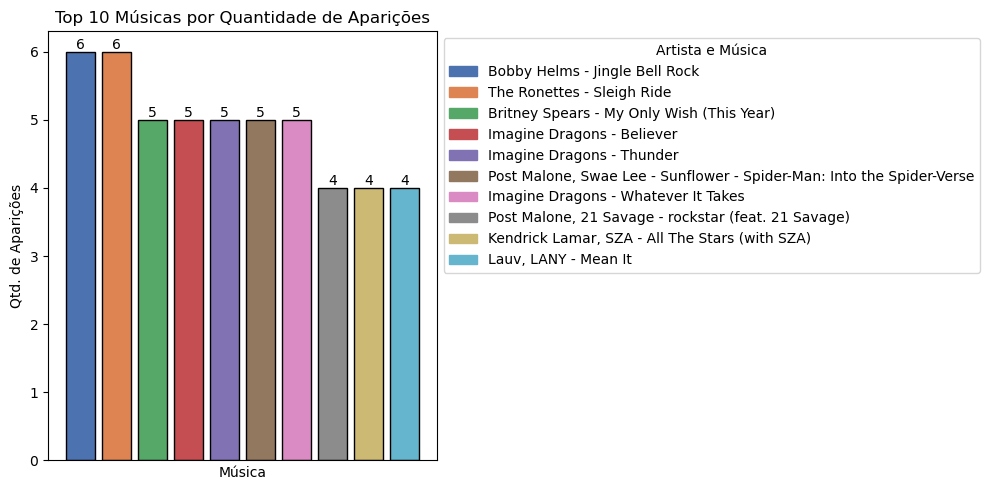

In [9]:
top_10 = musicas.head(10)
paleta_cores = plt.get_cmap('tab10')

cores = sns.color_palette("deep", len(top_10))

plt.figure(figsize=(10, 5))
bars = plt.bar(top_10['Musica'], top_10['QtdAparicoes'], color=cores, edgecolor='black')
plt.xlabel('Música')
plt.ylabel('Qtd. de Aparições')
plt.title('Top 10 Músicas por Quantidade de Aparições')

for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.xticks([])

legend_labels = [f"{artista} - {musica}" for artista, musica in zip(top_10['Artista'], top_10['Musica'])]
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Artista e Música')

plt.tight_layout()
plt.show()

###  3\.3\. Contagem de Aparições das 10 Gravadoras Mais Populares

Aqui serão listadas as gravadoras que mais se destacaram no top 200 do Spotify.

In [10]:
sources = dados['source'].str.split(', ').explode().value_counts().reset_index()
sources.columns = ['source', 'QtdAparicoes']

sources.head(10)

,source,QtdAparicoes
0,Columbia,317
1,Republic Records,271
2,Taylor Swift,178
3,LLC,150
4,Warner Records,140
5,Rimas Entertainment LLC,125
6,Sony Music Latin,124
7,BIGHIT MUSIC,119
8,Atlantic Records,110
9,Atlantic Records UK,106


#### 3\.3\.1\. Gráfico

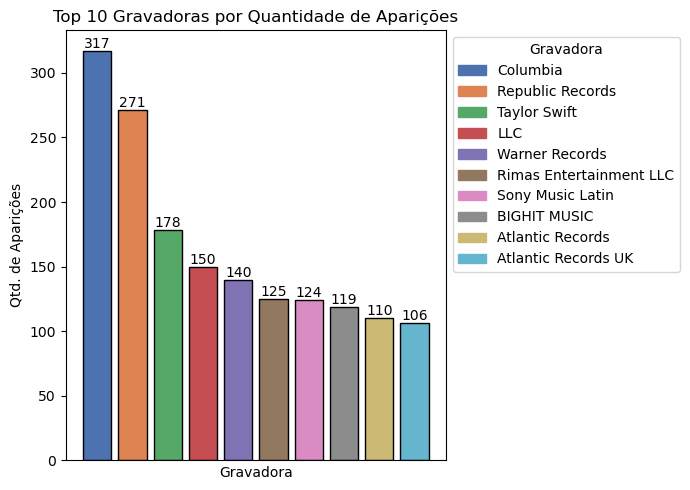

In [11]:
top_10 = sources.head(10)

cores = sns.color_palette("deep", len(top_10))

plt.figure(figsize=(7, 5))

bars = plt.bar(range(10), top_10['QtdAparicoes'], color=cores, edgecolor='black')
plt.xticks(range(10), top_10['source'], rotation=90)
plt.ylabel('Qtd. de Aparições')
plt.xlabel('Gravadora')
plt.title('Top 10 Gravadoras por Quantidade de Aparições')

for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
plt.xticks([]) 

legend_labels = top_10['source'] 
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Gravadora')

plt.tight_layout()
plt.show()


###  3\.4\. Contagem de Aparições de Tonalidade Musicais

Aqui serão mostradas as frequências com que uma tonalidade musical, que indica o centro tonal ao redor do qual a melodia e a harmonia giram,, apareceu neste ranking do Spotify.

In [12]:
key = dados.groupby(['key']).size()
key

key
A        524
A#/Bb    465
B        567
C        705
C#/Db    942
D        524
D#/Eb    182
E        424
F        531
F#/Gb    501
G        595
G#/Ab    553
dtype: int64

#### 3\.4\.1\. Gráfico

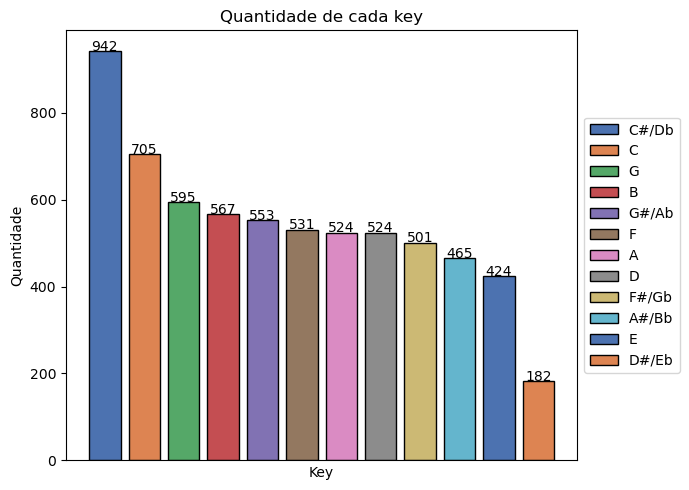

In [13]:
plt.figure(figsize=(7, 5))

key_counts = dados['key'].value_counts()
keys = key_counts.index

quantidades = key_counts.values

cores = sns.color_palette("deep", len(keys))

bars = plt.bar(keys, quantidades, color=cores, edgecolor='black')

plt.xlabel('Key')
plt.ylabel('Quantidade')
plt.title('Quantidade de cada key')

for i in range(len(keys)):
    plt.text(keys[i], quantidades[i] + 0.3, str(quantidades[i]), ha='center')

plt.xticks([]) 

plt.legend(bars, keys, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout() 

plt.show()

###  3\.5\. Contagem de Aparições do Modo Musical

Aqui serão exibidos o número de aparições no top 200 dos modos (mode), os quais indicam se a faixa está em uma tonalidade maior ou menor.

In [14]:
mode = dados.groupby(['mode']).size()
mode

mode
Major    3747
Minor    2766
dtype: int64

####  3\.5\.1\. Gráfico 

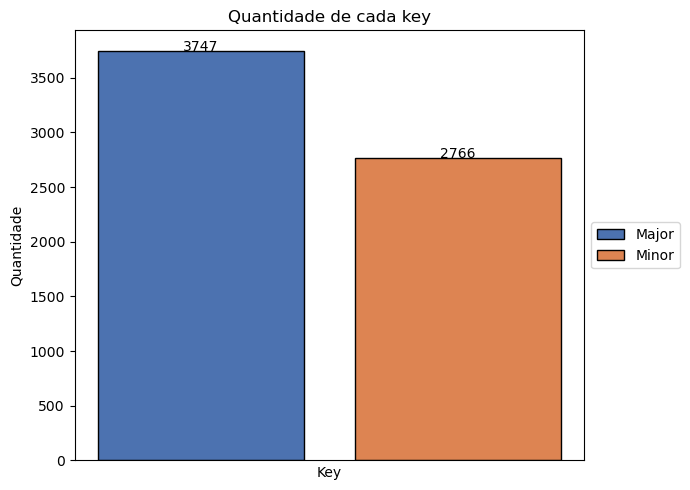

In [15]:
plt.figure(figsize=(7, 5))

mode_counts = dados['mode'].value_counts()
modes = mode_counts.index

quantidades = mode_counts.values

cores = sns.color_palette("deep", len(modes))

bars = plt.bar(modes, quantidades, color=cores, edgecolor='black')

plt.xlabel('Key')
plt.ylabel('Quantidade')
plt.title('Quantidade de cada key')

for i in range(len(modes)):
    plt.text(modes[i], quantidades[i] + 0.3, str(quantidades[i]), ha='center')

plt.xticks([]) 

plt.legend(bars, modes, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout() 

plt.show()

In [16]:
time_signature = dados.groupby(['time_signature']).size()
time_signature

time_signature
1            25
3 beats     324
4 beats    6057
5 beats     107
dtype: int64

In [17]:
dados.loc[dados['time_signature'] ==  '1', 
          'time_signature'] = "1 beat"

In [18]:
time_signature = dados.groupby(['time_signature']).size()
time_signature

time_signature
1 beat       25
3 beats     324
4 beats    6057
5 beats     107
dtype: int64

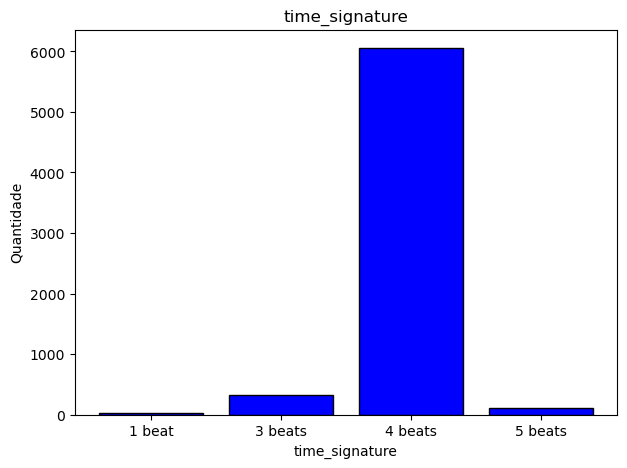

In [19]:
plt.figure(figsize=(7, 5))

counts = dados['time_signature'].value_counts()

sorted_counts = counts.sort_index()
sorted_time_signatures = sorted_counts.index
sorted_quantidades = sorted_counts.values

plt.bar(sorted_time_signatures, sorted_quantidades, color='blue', edgecolor='black')

plt.xlabel('time_signature')
plt.ylabel('Quantidade')
plt.title('time_signature')

plt.show()


## Atributos Musicais

## Atributos Musicais

### Removendo duplicatas, pois acredito que a presença delas pode impactar os resultados das próximas colunas.

Também estou emovendo colunas sobre semanas no gráfico e quantidade de streams, pois não são relevantes para determinar se uma música é única ou não.

In [20]:
dados_sem_duplicatas = dados.drop(['weeks_on_chart', 'streams'], axis=1)

duplicatas = dados_sem_duplicatas.duplicated()

dados_sem_duplicatas[duplicatas]

,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms
449,"Maroon 5, SZA",What Lovers Do (feat. SZA),Interscope Records*,F,Minor,4 beats,0.799,0.597,0.0611,0.07880,0.000006,0.1000,0.419,-5.131,110.001,199849
490,Kanye West,Praise God,Rock The World/IDJ/Kanye LP7,C#/Db,Major,4 beats,0.798,0.545,0.1680,0.00904,0.000095,0.2580,0.212,-6.466,118.029,226653
710,Joji,SLOW DANCING IN THE DARK,88rising Music,D#/Eb,Major,4 beats,0.515,0.479,0.0261,0.54400,0.005980,0.1910,0.284,-7.458,88.964,209274
719,Juice WRLD,Lucid Dreams,Juice WRLD Mixtape / ISR P&D,F#/Gb,Minor,4 beats,0.511,0.566,0.2000,0.34900,0.000000,0.3400,0.218,-7.230,83.903,239836
767,BTS,Dynamite,BIGHIT MUSIC,F#/Gb,Minor,4 beats,0.746,0.765,0.0993,0.01120,0.000000,0.0936,0.737,-4.410,114.044,199054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,Hozier,Almost (Sweet Music),Universal-Island Records Ltd.,G,Major,4 beats,0.523,0.687,0.1050,0.02150,0.000003,0.2030,0.711,-5.601,90.036,217480
6450,Bobby Helms,Jingle Bell Rock,Geffen,D,Major,4 beats,0.754,0.424,0.0363,0.64300,0.000000,0.0652,0.806,-8.463,119.705,130973
6477,Post Malone,Wow.,Republic Records,B,Minor,4 beats,0.829,0.539,0.2080,0.13600,0.000002,0.1030,0.388,-7.359,99.960,149547
6481,"Kygo, OneRepublic",Lose Somebody,Kygo,C#/Db,Major,4 beats,0.580,0.586,0.0357,0.34400,0.000000,0.0755,0.507,-6.883,147.988,199549


In [21]:
dados_sem_duplicatas = dados_sem_duplicatas.drop_duplicates()

len(dados_sem_duplicatas)

6161

### Visão geral do atributos musicais das músicas que estão presentes no top 200

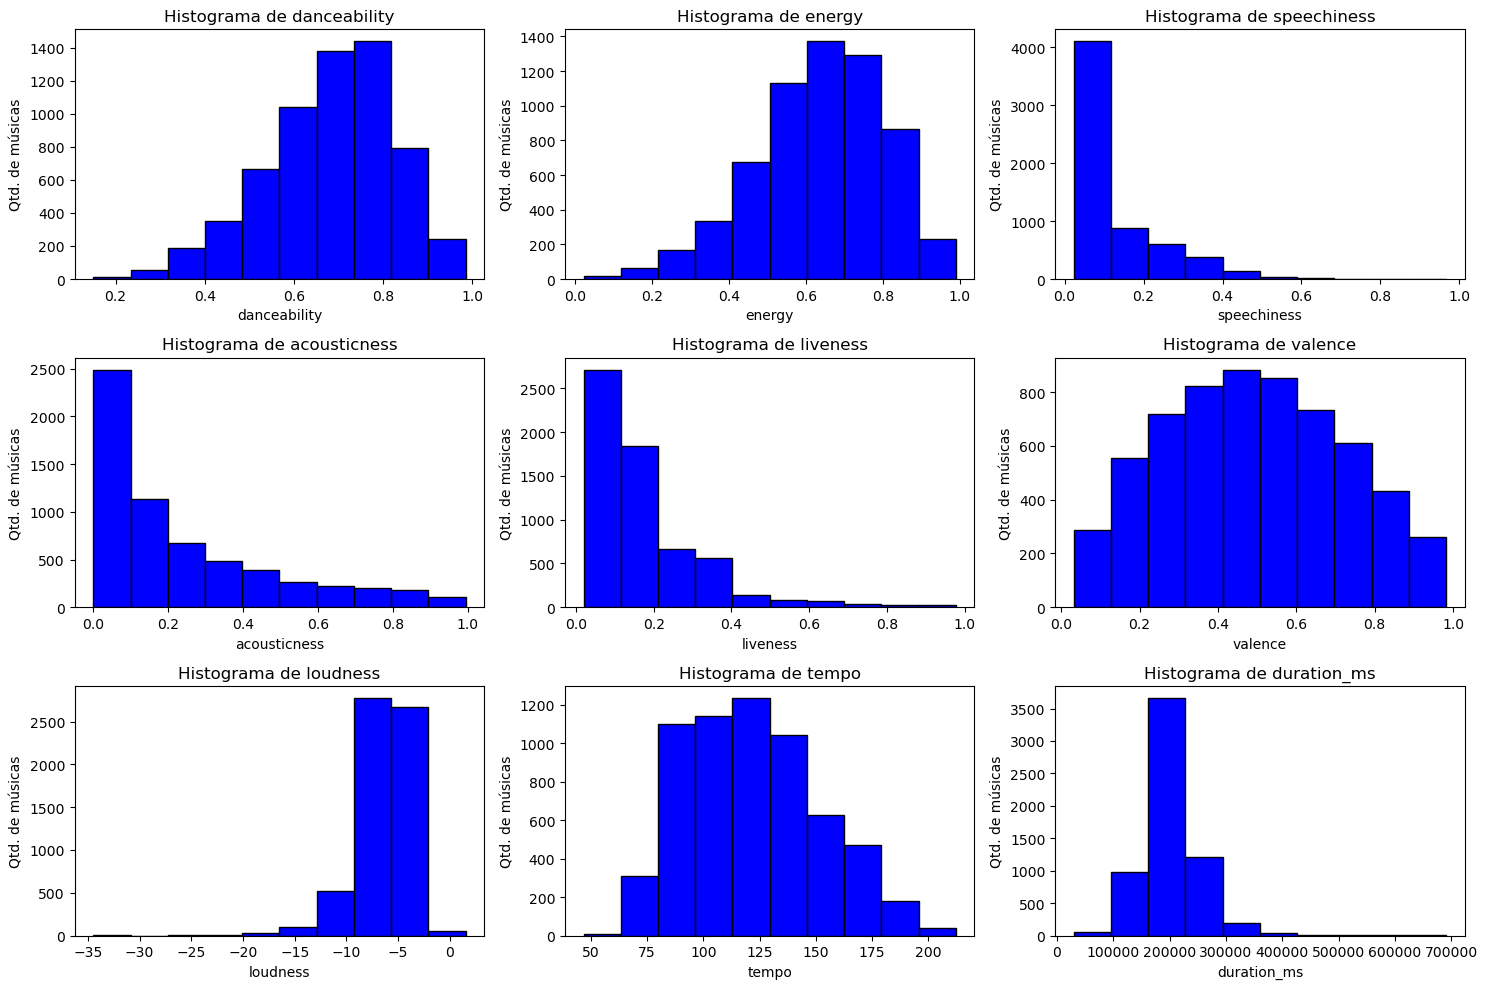

In [22]:
colunas = ['danceability', 'energy', 'speechiness',
           'acousticness', 'liveness', 'valence', 
           'loudness', 'tempo', 'duration_ms']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    axs[i].hist(dados_sem_duplicatas[coluna], bins=10, color='blue', edgecolor='black')
    axs[i].set_title(f'Histograma de {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Qtd. de músicas')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()


### Visão por atributo

In [23]:
def calculo_resumos(data, coluna):
    minimo = data[coluna].min()
    mediana = data[coluna].median()
    maximo = data[coluna].max()

    min_musica = data[data[coluna] == minimo][['artist_names', 'track_name']].values[0]
    median_musica = data[data[coluna] == mediana][['artist_names', 'track_name']].values[0]
    max_musica = data[data[coluna] == maximo][['artist_names', 'track_name']].values[0]

    return minimo, mediana, maximo, min_musica, median_musica, max_musica

#### Danceability

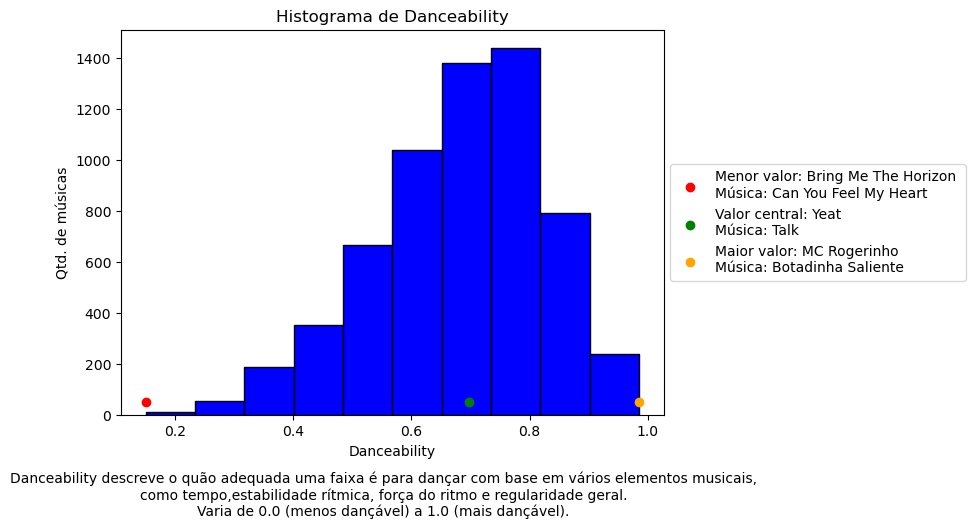

In [24]:
coluna = 'danceability'  # Nome da coluna desejada
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas, 
                                                                                 coluna)
plt.figure(figsize=(7, 5))
plt.hist(dados_sem_duplicatas[coluna], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

# Adicionar rótulos
plt.xlabel('Danceability')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Danceability')

# Adicionar descrição da dançabilidade abaixo do gráfico com quebras de linha
description = "Danceability descreve o quão adequada uma faixa é para dançar com base em vários elementos musicais,\ncomo tempo,estabilidade rítmica, força do ritmo e regularidade geral.\nVaria de 0.0 (menos dançável) a 1.0 (mais dançável)."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

# Exibir o histograma
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Energy

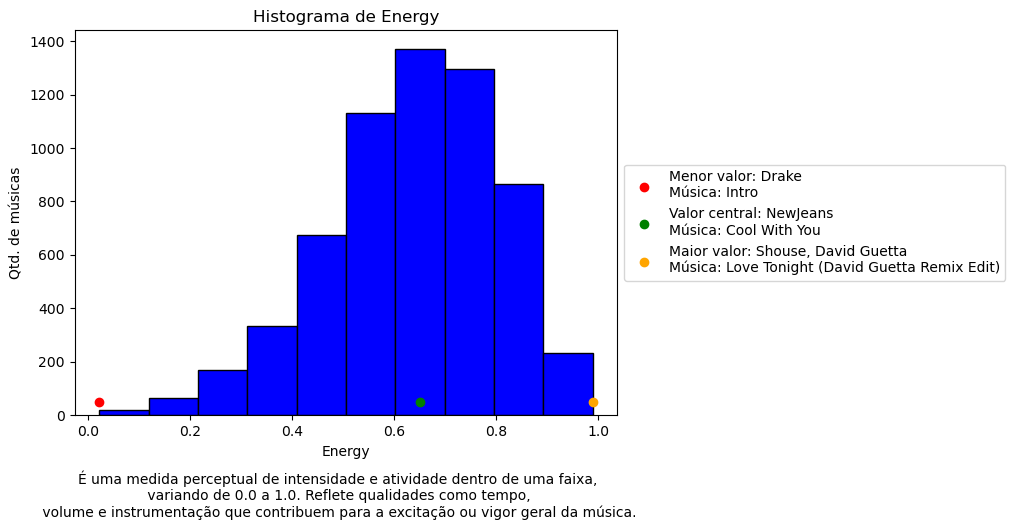

In [25]:
coluna = 'energy'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas,
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['energy'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Energy')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Energy')

description = "É uma medida perceptual de intensidade e atividade dentro de uma faixa,\n variando de 0.0 a 1.0. Reflete qualidades como tempo,\n volume e instrumentação que contribuem para a excitação ou vigor geral da música."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Speechiness

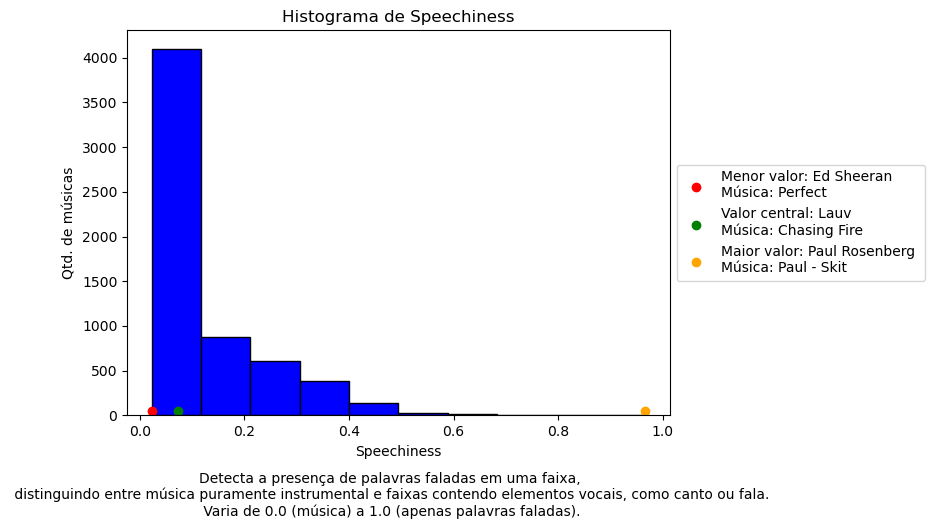

In [26]:
coluna = 'speechiness'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas, 
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['speechiness'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Speechiness')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Speechiness')

description = "Detecta a presença de palavras faladas em uma faixa,\n distinguindo entre música puramente instrumental e faixas contendo elementos vocais, como canto ou fala.\n Varia de 0.0 (música) a 1.0 (apenas palavras faladas)."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Acousticness

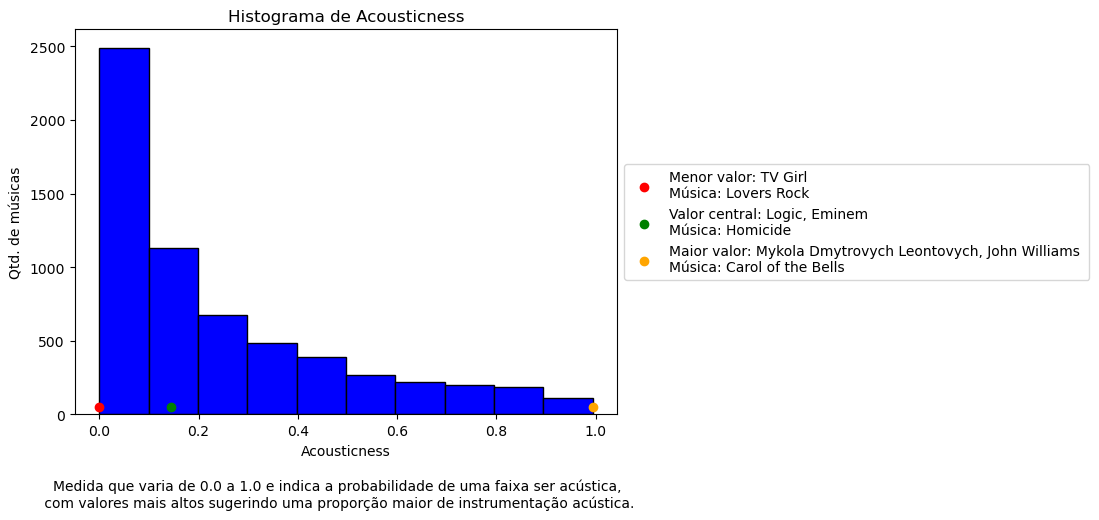

In [27]:
coluna = 'acousticness'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas, 
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['acousticness'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Acousticness')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Acousticness')

description = "Medida que varia de 0.0 a 1.0 e indica a probabilidade de uma faixa ser acústica,\n com valores mais altos sugerindo uma proporção maior de instrumentação acústica."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Instrumentalness

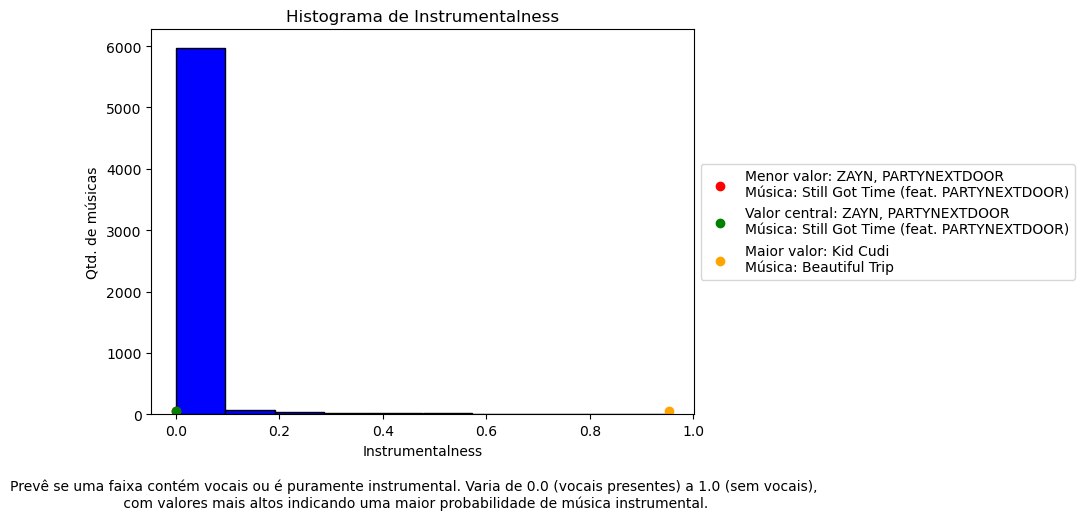

In [28]:
coluna = 'instrumentalness'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas,
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['instrumentalness'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Instrumentalness')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Instrumentalness')

description = "Prevê se uma faixa contém vocais ou é puramente instrumental. Varia de 0.0 (vocais presentes) a 1.0 (sem vocais),\n com valores mais altos indicando uma maior probabilidade de música instrumental."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Muitas músicas nesta coluna possuem o valor igual a zero, o que acaba tornando a mediana também igual a zero. Nesse contexto, a mediana não possui muito valor informativo. No entanto, optei por mantê-la por razões de padronização e consistência na análise. Explicando o por que dessa ocorrência, para assim fornecer um contexto compreensível e evitar confusões.

#### Liveness

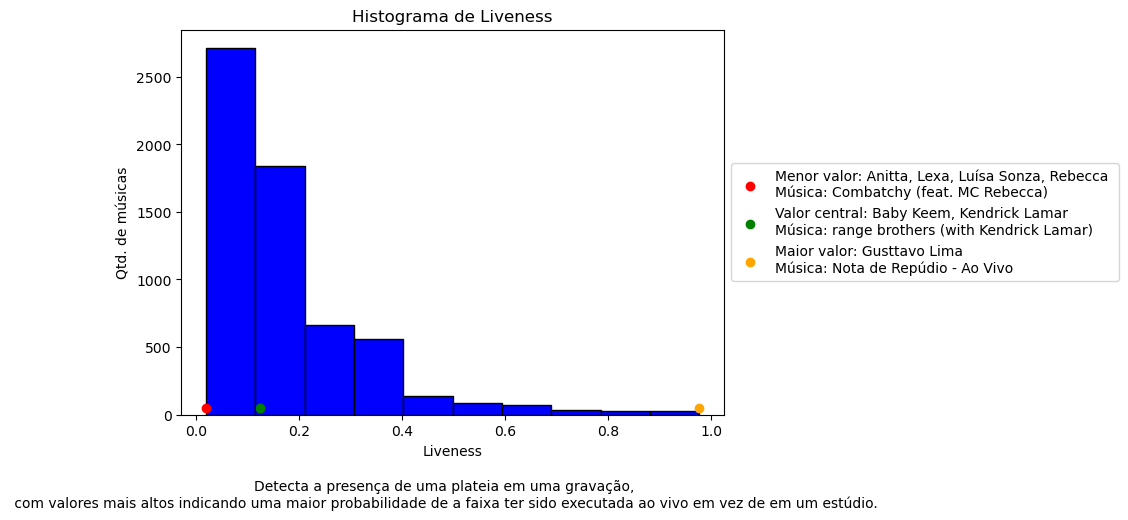

In [29]:
coluna = 'liveness'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas, 
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['liveness'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Liveness')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Liveness')

description = "Detecta a presença de uma plateia em uma gravação,\n com valores mais altos indicando uma maior probabilidade de a faixa ter sido executada ao vivo em vez de em um estúdio."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Valence

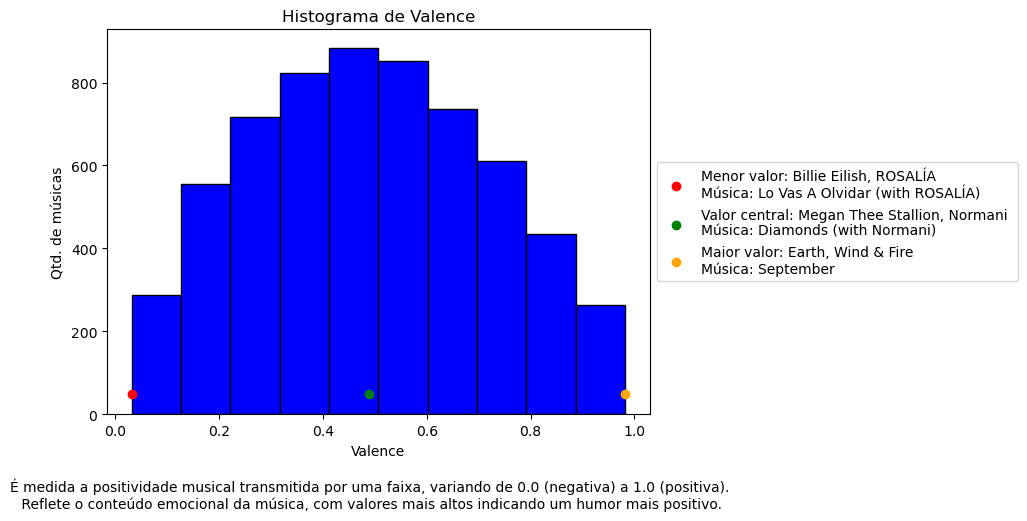

In [30]:
coluna = 'valence'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas, 
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['valence'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Valence')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Valence')

description = "É medida a positividade musical transmitida por uma faixa, variando de 0.0 (negativa) a 1.0 (positiva).\n Reflete o conteúdo emocional da música, com valores mais altos indicando um humor mais positivo."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Loudness

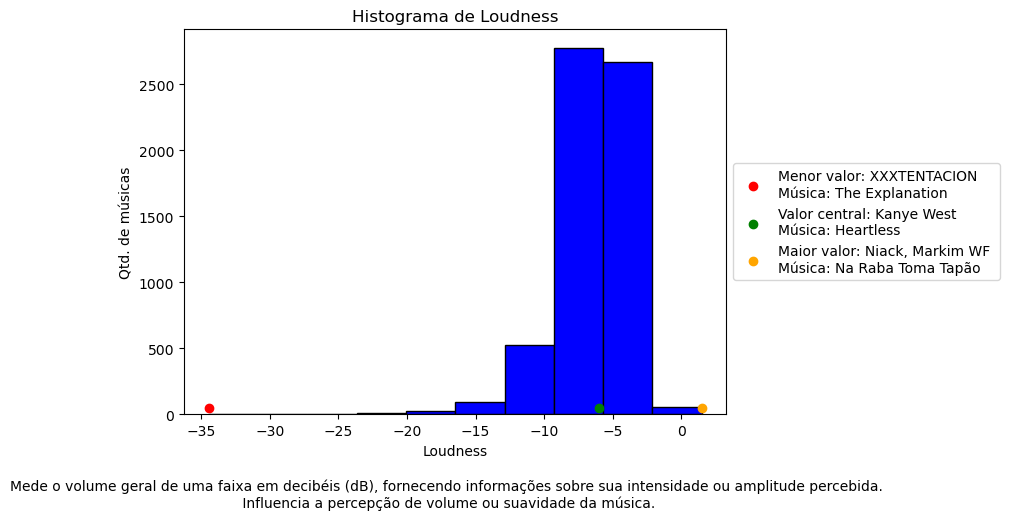

In [31]:
coluna = 'loudness'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas,
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['loudness'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')
plt.xlabel('Loudness')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Loudness')

description = "Mede o volume geral de uma faixa em decibéis (dB), fornecendo informações sobre sua intensidade ou amplitude percebida.\n Influencia a percepção de volume ou suavidade da música."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Tempo

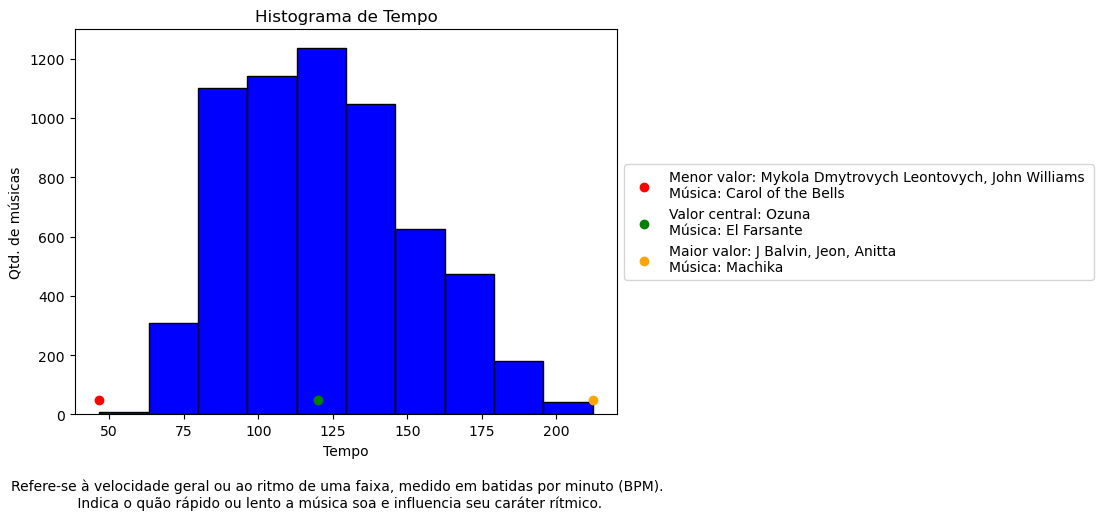

In [32]:
coluna = 'tempo'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas,
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['tempo'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Tempo')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Tempo')

description = "Refere-se à velocidade geral ou ao ritmo de uma faixa, medido em batidas por minuto (BPM).\n Indica o quão rápido ou lento a música soa e influencia seu caráter rítmico."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Duration_ms

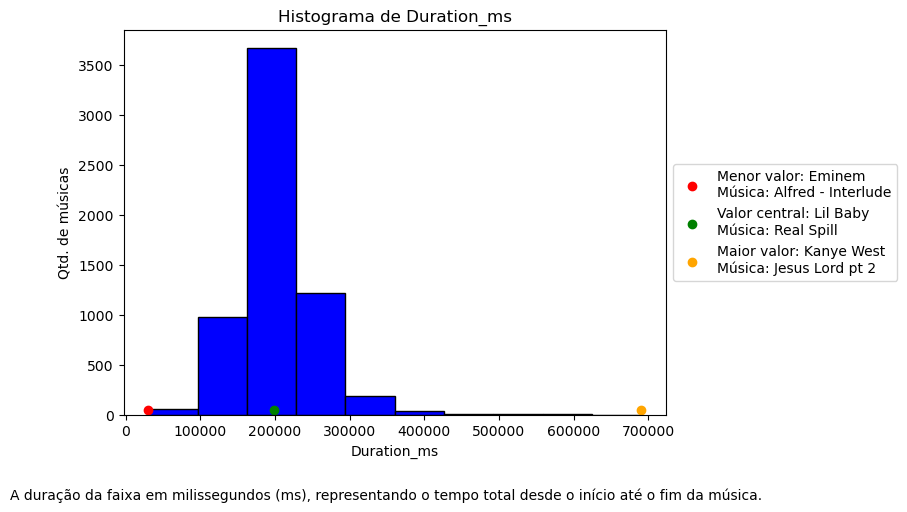

In [33]:
coluna = 'duration_ms'
minimo, mediana, maximo, min_musica, median_musica, max_musica = calculo_resumos(dados_sem_duplicatas,
                                                                                 coluna)
plt.figure(figsize=(7, 5))

plt.hist(dados_sem_duplicatas['duration_ms'], bins=10, color='blue', edgecolor='black')

plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
plt.scatter(mediana, 50, color='green', label=f'Valor central: {median_musica[0]} \nMúsica: {median_musica[1]}')
plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')

plt.xlabel('Duration_ms')
plt.ylabel('Qtd. de músicas')
plt.title('Histograma de Duration_ms')

description = "A duração da faixa em milissegundos (ms), representando o tempo total desde o início até o fim da música."
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Popularidade e Desempenho:

### Músicas com mais semanas no top 200

In [34]:
dados = dados.sort_values(by='weeks_on_chart', ascending=False)

dados[['artist_names', 'track_name', 'weeks_on_chart']].head(10)

,artist_names,track_name,weeks_on_chart
688,Imagine Dragons,Believer,367
748,Ed Sheeran,Perfect,363
6383,Ed Sheeran,Shape of You,333
752,"Billie Eilish, Khalid",lovely (with Khalid),308
4946,James Arthur,Say You Won't Let Go,297
370,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,275
6378,Lewis Capaldi,Someone You Loved,270
5554,Travis Scott,goosebumps,238
435,The Weeknd,Blinding Lights,224
6318,XXXTENTACION,Jocelyn Flores,217


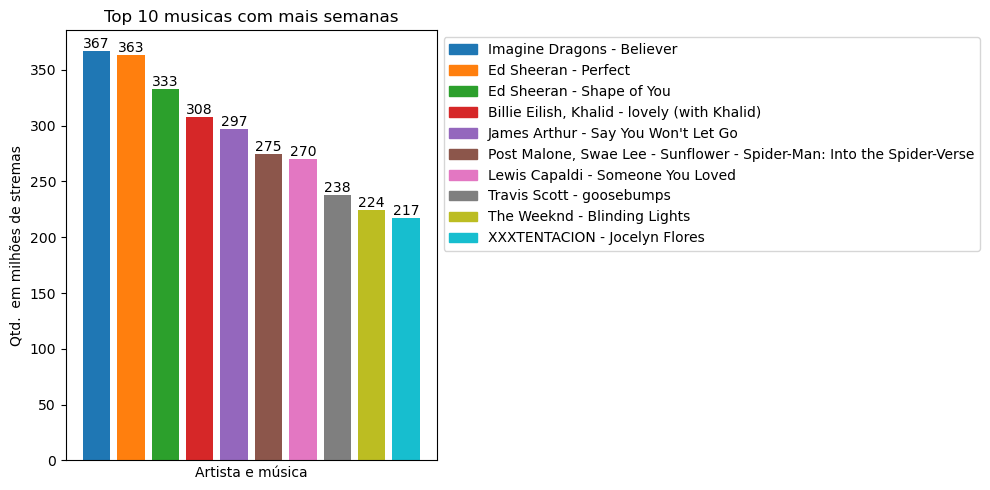

In [35]:
top_10_weeks = dados[['artist_names', 'track_name', 'weeks_on_chart']].head(10)

paleta_cores = plt.cm.tab10

plt.figure(figsize=(10, 5))

# Create an index array to adjust the position of bars for the same artist
index = np.arange(len(top_10_weeks))

bars = plt.bar(index, top_10_weeks['weeks_on_chart'], color=paleta_cores(index))
plt.xticks(index, top_10_weeks['artist_names'], rotation=90)  # Set x-tick labels to artist names with rotation
plt.ylabel('Qtd.  em milhões de stremas')
plt.xlabel('Artista e música')
plt.title('Top 10 musicas com mais semanas')

for idx, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{top_10_weeks["weeks_on_chart"].iloc[idx]}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
plt.xticks([])  # Desativa os textos do eixo x

legend_labels = [f"{artista} - {musica}" for artista, musica in zip(top_10_weeks['artist_names'], top_10_weeks['track_name'])]
legend_handles = [Patch(color=paleta_cores(i), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Músicas com mais streams

In [36]:
dados = dados.sort_values(by='streams', ascending=False)

dados[['artist_names', 'track_name', 'streams']].head(10)

,artist_names,track_name,streams
435,The Weeknd,Blinding Lights,3528450184
6383,Ed Sheeran,Shape of You,3509169565
6378,Lewis Capaldi,Someone You Loved,3029241037
748,Ed Sheeran,Perfect,2797600939
3523,Harry Styles,As It Was,2580052047
752,"Billie Eilish, Khalid",lovely (with Khalid),2417312282
5391,Harry Styles,Watermelon Sugar,2351753978
33,Glass Animals,Heat Waves,2265473708
1530,Tones And I,Dance Monkey,2250351787
4550,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),2168948336


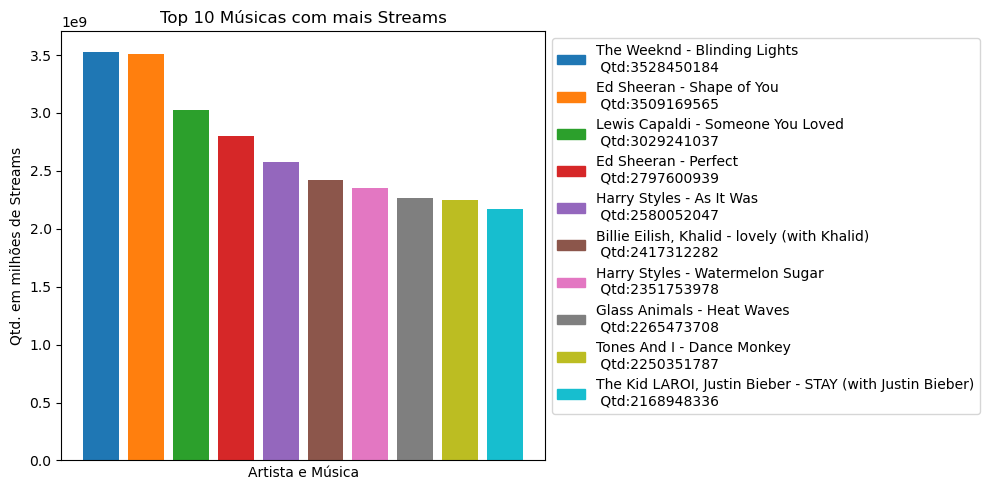

In [37]:
top_10_streams = dados[['artist_names', 'track_name', 'streams']].head(10)

paleta_cores = plt.cm.tab10

plt.figure(figsize=(10, 5))

# Create an index array to adjust the position of bars for the same artist
index = np.arange(len(top_10_streams))

bars = plt.bar(index, top_10_streams['streams'], color=paleta_cores(index))
plt.xticks(index, top_10_streams['artist_names'], rotation=90)  # Set x-tick labels to artist names with rotation
plt.ylabel('Qtd. em milhões de Streams')
plt.xlabel('Artista e Música')
plt.title('Top 10 Músicas com mais Streams')

plt.xticks([])  # Desativa os textos do eixo x

legend_labels = [f"{artista} - {musica}\n Qtd:{streams}" for artista, musica, streams in zip(top_10_streams['artist_names'], top_10_streams['track_name'], top_10_streams['streams'])]
legend_handles = [Patch(color=paleta_cores(i), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [38]:
lista_nomes = artistas['Artista'].tolist()
len(lista_nomes)

2047

In [ ]:
artist_totals = {}

# Iterando sobre o DataFrame para calcular os totais de streams para cada artista
for artist in lista_nomes:
    artist_totals[artist] = dados[dados['artist_names'].str.contains(artist, regex=False)]['streams'].sum()

# Convertendo o dicionário em um DataFrame
total_views = pd.DataFrame(list(artist_totals.items()), columns=['nome', 'total'])

total_streams = total_views.sort_values(by='total', ascending=False)

total_streams.head(10)

In [ ]:
top_10_total_streams = total_streams.head(10)

paleta_cores = plt.cm.tab10

plt.figure(figsize=(10, 5))

# Create an index array to adjust the position of bars for the same artist
index = np.arange(len(top_10_streams))

bars = plt.bar(index, top_10_total_streams['total'], color=paleta_cores(index))
plt.xticks(index, top_10_total_streams['nome'], rotation=90)  # Set x-tick labels to artist names with rotation
plt.ylabel('Qtd. em bilhões de Streams')
plt.xlabel('Artista')
plt.title('Top 10 Artistas com mais Streams')

plt.xticks([])  # Desativa os textos do eixo x

legend_labels = top_10_total_streams['nome']  # Ajuste para usar apenas os nomes dos artistas
legend_handles = [Patch(color=paleta_cores(i), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()